#check version of CUDA present in our system

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


#installing and importing the required packages

In [ ]:
!pip install easyocr
!pip install imutils
!pip install opencv-python-headless==1.2.30 
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 17.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python-headless==1.2.30 (from versions: 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-python-headless==1.2.30
Looking in indexes

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

#convert colored image into grayscale format

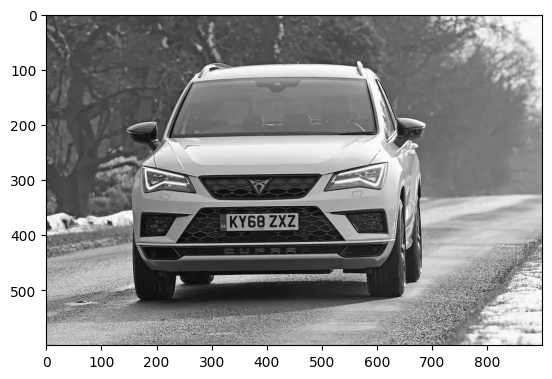

In [ ]:
img=cv2.imread('/content/car.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

#apply filter and edge detection

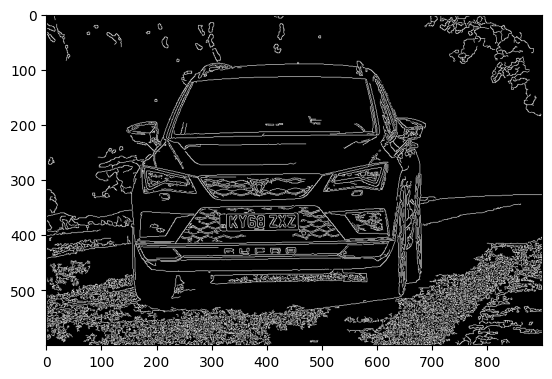

In [ ]:
bfilter=cv2.bilateralFilter(gray,11,17,17)#noise reduction
edged=cv2.Canny(bfilter,30,200)#edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

#Find Contours and Apply Mask

In [ ]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:30]

In [ ]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,4,True)
  if len(approx)==4:
    location=approx
    break


In [ ]:
location

array([[[457, 363]],

       [[456, 391]],

       [[327, 390]],

       [[329, 362]]], dtype=int32)

In [ ]:
mask=np.zeros(gray.shape,np.uint8)
new_img=cv2.drawContours(mask,[location],0,255,-1)
new_img=cv2.bitwise_and(img,img,mask=mask)

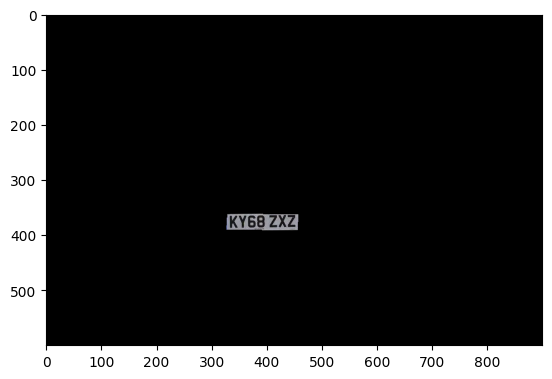

In [ ]:
plt.imshow(cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB))

In [ ]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_img=gray[x1:x2+1,y1:y2+1]


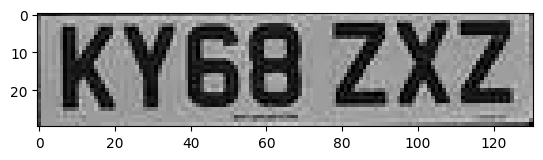

In [ ]:
plt.imshow(cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB))

#Use Easy OCR to read text

In [ ]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_img)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[0, 0], [131, 0], [131, 30], [0, 30]], 'KY68 ZXZ', 0.7255619433440466)]

#Plot the Result

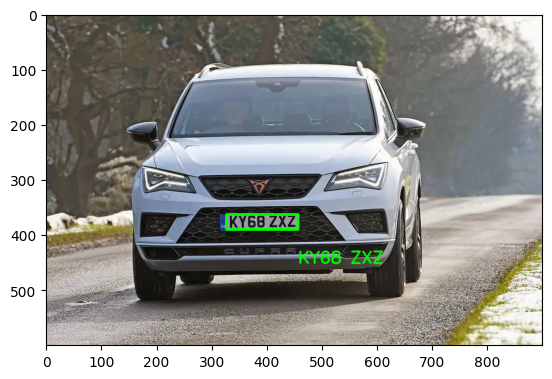

In [14]:
text=result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
res=cv2.putText(img,text=text,org=(approx[0][0][0],approx[1][0][1]+60),fontFace=font,fontScale=1,color=(0,255,0),thickness=2,lineType=cv2.LINE_AA)
res=cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))